<a href="https://colab.research.google.com/github/daaaanish17/Assignment/blob/main/assignmenttt001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('student_records.csv')
df.head()

,S.No,Gender,Score_Football_Question,Total_Examination_Score
0,1,M,1,80
1,2,M,0,90
2,3,M,0,60
3,4,M,1,65
4,5,F,0,80


## Q1) How might we analyse such data to see, if the 'football' question has a gender bias?**

In [6]:
gp = df.groupby('Gender')['Score_Football_Question'].sum()
gp

Gender
F    9
M    7
Name: Score_Football_Question, dtype: int64

Visual Representation

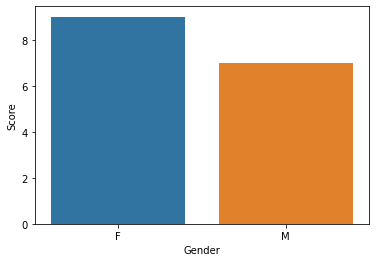

In [7]:
sns.barplot(x = ['F', 'M'],y = gp)
plt.xlabel('Gender')
plt.ylabel('Score')
plt.show()

Ans) No gender bias.

## Q2) Developing a classifier/text categorization Machine Learning model that will tag/classify the new unseen data from the testing dataset.

In [10]:
# reading .csv file
df2 = pd.read_csv('train.csv')
df2.head()

,passage_topic,class
0,Labour plans maternity pay rise,politics
1,Watchdog probes e-mail deletions,politics
2,Hewitt decries 'career sexism',politics
3,Labour chooses Manchester,politics
4,Brown ally rejects Budget spree,politics


In [11]:
# unique classes
df2['class'].unique()

array(['politics', 'entertainment', 'tech', 'sport', 'business', nan],
      dtype=object)

In [12]:
import numpy as np # linear algebra
import re #Regular Expression Library
import nltk #Natual Langage Toolkit
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

DATA CLEANING AND PRE PROCESSING

In [13]:
# Checking for null values

df2.isnull().sum()

passage_topic    1944
class            1944
dtype: int64

In [14]:
# dropping nan values
df2 = df2.dropna()
df2.isnull().sum()

passage_topic    0
class            0
dtype: int64

In [15]:
# Removing URLs

def remove_url(text):
  url = re.compile(r'https?://\S+|www\.\S+')
  return url.sub(r'', text)

df2['passage_topic'] = df2['passage_topic'].apply(remove_url) 

In [16]:
#REMOVING HTML TAGS
def remove_html(text):
    html = re.compile(r'<.*?>')
    return html.sub(r'',text)
df2['passage_topic'] = df2['passage_topic'].apply(remove_html)

In [17]:
#removing pictures/tags/symbols and emojis 
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)
df2['passage_topic'] = df2['passage_topic'].apply(remove_emojis)

In [18]:
#removing punctuations
import string
def remove_punct(text):
    table = str.maketrans('','',string.punctuation)
    return text.translate(table)
df2['passage_topic'] = df2['passage_topic'].apply(remove_punct)

Downloading some important nltk packages.

In [19]:
# downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [21]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [22]:
df2.head(3)

,passage_topic,class
0,Labour plans maternity pay rise,politics
1,Watchdog probes email deletions,politics
2,Hewitt decries career sexism,politics


Some more data cleaning steps:

1) Removing Special Characters and numbers.

2) Converting text into lower case.

3) Splits a string into a list.

4) Removing Stopwords and also performing Lematization.

In [23]:
lemmatizer = WordNetLemmatizer()
for i in range(0, len(df2)):
    review = re.sub('[^a-zA-Z]', ' ', df2['passage_topic'][i]) 
    review = review.lower()
    review = review.split() 
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')] 
    review = ' '.join(review)
    df2.loc[[i], ['text']] = review 

In [24]:
df2.head(3)

,passage_topic,class,text
0,Labour plans maternity pay rise,politics,labour plan maternity pay rise
1,Watchdog probes email deletions,politics,watchdog probe email deletion
2,Hewitt decries career sexism,politics,hewitt decries career sexism


Label Encoding:

In label encoding in Python, we replace the categorical value with a numeric value.

In [25]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

df2['class'] = le.fit_transform(df2['class'])
df2

,passage_topic,class,text
0,Labour plans maternity pay rise,2,labour plan maternity pay rise
1,Watchdog probes email deletions,2,watchdog probe email deletion
2,Hewitt decries career sexism,2,hewitt decries career sexism
3,Labour chooses Manchester,2,labour chooses manchester
4,Brown ally rejects Budget spree,2,brown ally reject budget spree
...,...,...,...
1964,Gazprom in 36m backtax claim,0,gazprom backtax claim
1965,Germany calls for EU reform,0,germany call eu reform
1966,Parmalat founder offers apology,0,parmalat founder offer apology
1967,Golden economic period to end,0,golden economic period end


In [26]:
df2['class'].value_counts()

3    461
0    454
2    367
4    351
1    336
Name: class, dtype: int64

Shuffling DataFrame rows

In [27]:
df2 = df2.sample(frac = 1, ignore_index=True)
df2

,passage_topic,class,text
0,Tory leader quits legal position,2,tory leader quits legal position
1,Neeson in bid to revive theatre,1,neeson bid revive theatre
2,SEC to rethink postEnron rules,0,sec rethink postenron rule
3,China net cafe culture crackdown,4,china net cafe culture crackdown
4,Wife Swap makers sue US copycat,1,wife swap maker sue u copycat
...,...,...,...
1964,Microsoft releases patches,4,microsoft release patch
1965,Fox attacks Blairs Tory lies,2,fox attack blair tory lie
1966,Apple sues to stop product leaks,4,apple sue stop product leak
1967,Yukos unit fetches 9bn at auction,0,yukos unit fetch bn auction


In [28]:
#converting data into numerical matrix

from sklearn.feature_extraction.text import TfidfVectorizer
count_vectorizer = TfidfVectorizer()
train_vectors = count_vectorizer.fit_transform(df2["text"])

Our Model

In [29]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()

Training our model

In [30]:
clf.fit(train_vectors, df2["class"])

MultinomialNB()

### Classifing new unseen data from the testing dataset.

In [33]:
df3 = pd.read_csv('test2.csv', usecols=['passage_topic', 'class'])
df3.head()

,passage_topic,class
0,Beijingers fume over parking fees,business
1,GM issues 2005 profits warning,business
2,US economy still growing says Fed,business
3,Wall Street cool to eBay's profit,business
4,WorldCom trial starts in New York,business


DATA CLEANING AND PRE PROCESSING

In [34]:
# Checking for null values

df3.isnull().sum()

passage_topic    0
class            0
dtype: int64

In [35]:
# Removing URLs
df3['passage_topic'] = df3['passage_topic'].apply(remove_url) 

In [36]:
#REMOVING HTML TAGS
df3['passage_topic'] = df3['passage_topic'].apply(remove_html)

In [37]:
#removing pictures/tags/symbols and emojis 
df3['passage_topic'] = df3['passage_topic'].apply(remove_emojis)

In [38]:
#removing punctuations
df3['passage_topic'] = df3['passage_topic'].apply(remove_punct)

In [39]:
df3.head(3)

,passage_topic,class
0,Beijingers fume over parking fees,business
1,GM issues 2005 profits warning,business
2,US economy still growing says Fed,business


In [40]:
for i in range(0, len(df3)):
    review = re.sub('[^a-zA-Z]', ' ', df3['passage_topic'][i])
    review = review.lower()
    review = review.split()
    
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    df3.loc[[i], ['text']] = review 

In [41]:
df3.head(3)

,passage_topic,class,text
0,Beijingers fume over parking fees,business,beijingers fume parking fee
1,GM issues 2005 profits warning,business,gm issue profit warning
2,US economy still growing says Fed,business,u economy still growing say fed


In [42]:
# Label Encoding
df3['class'] = le.fit_transform(df3['class'])
df3

,passage_topic,class,text
0,Beijingers fume over parking fees,0,beijingers fume parking fee
1,GM issues 2005 profits warning,0,gm issue profit warning
2,US economy still growing says Fed,0,u economy still growing say fed
3,Wall Street cool to eBays profit,0,wall street cool ebays profit
4,WorldCom trial starts in New York,0,worldcom trial start new york
...,...,...,...
245,BT program to beat dialler scams,4,bt program beat dialler scam
246,Spam emails tempt net shoppers,4,spam email tempt net shopper
247,Be careful how you code,4,careful code
248,US cyber security chief resigns,4,u cyber security chief resigns


In [43]:
df3['class'].value_counts()

0    50
1    50
2    50
3    50
4    50
Name: class, dtype: int64

Shuffling DataFrame rows

In [44]:
df3 = df3.sample(frac = 1, ignore_index=True)
df3

,passage_topic,class,text
0,Navratilova hits out at critics,3,navratilova hit critic
1,Sony PSP handheld console hits US,4,sony psp handheld console hit u
2,EU rules wont stop UK spending,2,eu rule wont stop uk spending
3,Arnold congratulated on Oscar win,1,arnold congratulated oscar win
4,Beckham virus spotted on the net,4,beckham virus spotted net
...,...,...,...
245,California sets fines for spyware,4,california set fine spyware
246,Blunkett hints at election call,2,blunkett hint election call
247,Savvy searchers fail to spot ads,4,savvy searcher fail spot ad
248,Christmas sales worst since 1981,0,christmas sale worst since


In [45]:
#converting data into numerical matrix
test_vectors = count_vectorizer.transform(df3["text"])

In [46]:
# dependent variable
y_actual = df3['class']
y_actual

0      3
1      4
2      2
3      1
4      4
      ..
245    4
246    2
247    4
248    0
249    2
Name: class, Length: 250, dtype: int64

Predicting the class of passages.

In [47]:
y_predict = clf.predict(test_vectors)
y_predict

array([0, 4, 0, 1, 4, 2, 4, 3, 0, 1, 3, 3, 0, 2, 2, 4, 4, 0, 1, 2, 1, 3,
       2, 4, 1, 2, 3, 0, 1, 0, 1, 2, 4, 0, 3, 1, 4, 2, 3, 1, 4, 3, 1, 3,
       1, 3, 1, 2, 3, 1, 1, 2, 4, 2, 0, 2, 0, 4, 2, 2, 0, 4, 2, 4, 2, 3,
       3, 3, 3, 2, 1, 3, 4, 3, 4, 2, 4, 3, 4, 2, 3, 0, 3, 4, 2, 0, 1, 3,
       3, 2, 2, 3, 0, 4, 1, 3, 0, 0, 0, 4, 1, 1, 1, 2, 1, 0, 4, 0, 2, 3,
       2, 4, 1, 4, 3, 4, 4, 4, 4, 3, 0, 0, 0, 3, 4, 2, 2, 4, 3, 0, 4, 3,
       1, 1, 3, 1, 3, 0, 4, 4, 3, 4, 3, 2, 3, 1, 3, 3, 3, 2, 1, 3, 3, 3,
       2, 0, 3, 2, 0, 3, 0, 1, 2, 4, 2, 2, 2, 1, 1, 0, 4, 0, 0, 4, 0, 3,
       0, 3, 3, 4, 1, 0, 4, 0, 2, 4, 3, 1, 3, 3, 0, 4, 1, 0, 3, 0, 2, 2,
       1, 0, 4, 1, 4, 3, 4, 4, 0, 0, 0, 3, 0, 4, 3, 4, 2, 1, 3, 0, 3, 0,
       3, 0, 1, 1, 1, 4, 0, 0, 1, 2, 2, 4, 4, 0, 0, 2, 3, 0, 4, 4, 0, 0,
       4, 2, 0, 4, 2, 4, 0, 2])

Accuracy classification score

In [50]:
from sklearn.metrics import accuracy_score

accuracy_score(y_actual, y_predict)

0.816

## Q3) Validate that the randomly drawn two passages from the entire dataset (train+test) is not duplicate. Once this is verified, retrieve/display the two passages drawn by the program.

In [55]:
df4 = pd.read_csv('TrainPlusTest.csv', usecols=['passage_topic', 'class'])
df4.head()

,passage_topic,class
0,Beijingers fume over parking fees,business
1,GM issues 2005 profits warning,business
2,US economy still growing says Fed,business
3,Wall Street cool to eBay's profit,business
4,WorldCom trial starts in New York,business


In [56]:
# Checking for null values

df4.isnull().sum()

passage_topic    1944
class            1944
dtype: int64

In [57]:
# dropping nan values
df4 = df4.dropna()
df4.isnull().sum()

passage_topic    0
class            0
dtype: int64

Shuffling DataFrame rows

In [58]:
df4 = df4.sample(frac = 1, ignore_index=True)
df4

,passage_topic,class
0,McClaren hails Boro's Uefa spirit,sport
1,Egypt and Israel seal trade deal,business
2,Yeading face Newcastle in FA Cup,sport
3,Old Firm pair handed suspensions,sport
4,Weak dollar trims Cadbury profits,business
...,...,...
2214,Hingis hints at playing comeback,sport
2215,Famed music director Viotti dies,entertainment
2216,Hollywood campaign hits websites,tech
2217,Lions blow to World Cup stars,sport


Removing Duplicate Rows

In [59]:
df4=df4.drop_duplicates()

Randomly selecting two passages from the entire dataset(train+test) 

In [65]:
print(df4.sample(n = 2, replace=False))
print('\nThe two passages drawn by the program are not same')

                         passage_topic     class
330           EU fraud clampdown urged  politics
2210  Coach Ranieri sacked by Valencia     sport

The two passages drawn by the program are not same
